<a href="https://colab.research.google.com/github/Cepera90/FB/blob/RFR/FB_RFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [1]:
def csv(path):
  df = pd.read_csv(path, index_col = 'Дата', 
                   parse_dates=True, quotechar='"', 
                   decimal=",", dayfirst=True)
  df = df.sort_values(by="Дата",
               ascending=True)
  df['Объём'] = [x.replace(',', '.').replace('M', '') for x in df['Объём']]
  df['Изм. %'] = [x.replace('+', '').replace('-', '').replace('%', '').replace(',', '.') for x in df['Изм. %']]
  df.loc['2022-01-14':,'Цена':'Изм. %'] = df.loc['2022-01-14':,'Цена':'Изм. %'].astype(float)
  return df

In [6]:
df = csv('/content/FB.csv')

In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0:1]

In [13]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
tuned_parameters = {'n_estimators': [500, 600, 700], 'min_samples_split': [3, 4, 5]}
clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters)
clf.fit(Xtrain, ytrain.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [3, 4, 5],
                         'n_estimators': [500, 600, 700]})

In [ ]:
clf.best_params_

{'min_samples_split': 4, 'n_estimators': 600}

In [9]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=600, min_samples_split=4)
forest.fit(Xtrain, ytrain.values.ravel())

RandomForestRegressor(min_samples_split=4, n_estimators=600)

In [ ]:
from sklearn.metrics import r2_score
y_model = forest.predict(Xtest) 
r2_score_RFR = r2_score(ytest, y_model)
print("RFR R2 score", r2_score_RFR)

RFR R2 score 0.9996944825412767


In [14]:
ytest['Цена_прогноз'] = forest.predict(Xtest)

In [15]:
ytest = ytest.rename_axis('Дата').reset_index()
ytest = ytest.sort_values(by="Дата").reset_index(drop=True)

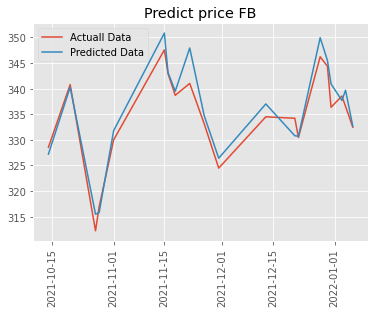

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(ytest["Дата"][589:], ytest["Цена"][589:], label='Actuall Data') #actual plot
plt.plot(ytest["Дата"][589:], ytest["Цена_прогноз"][589:], label='Predicted Data') #predicted plot
plt.xticks(rotation=90)
plt.title('Predict price FB')
plt.legend()
plt.show()

In [17]:
df_new = csv('/content/FB_new.csv')

In [18]:
X_new = df_new.iloc[:, 1:]
y_new = df_new.iloc[:, 0:1]

In [19]:
from sklearn.metrics import r2_score
model_new = forest.predict(X_new) 
r2_score_RFR = r2_score(y_new, model_new)
print("RFR R2 score", r2_score_RFR)

RFR R2 score 0.5871964036805392


In [21]:
y_new['Цена_прогноз'] = forest.predict(X_new)
y_new = y_new.rename_axis('Дата').reset_index()
y_new = y_new.sort_values(by="Дата").reset_index(drop=True)
y_new

,Дата,Цена,Цена_прогноз
0,2022-01-18,318.15,323.595695
1,2022-01-19,319.59,323.573892
2,2022-01-20,316.56,323.967422
3,2022-01-21,303.17,312.347073
4,2022-01-24,308.71,304.513528
5,2022-01-25,300.15,302.663597
6,2022-01-26,294.63,302.004114
7,2022-01-27,299.65,298.049480


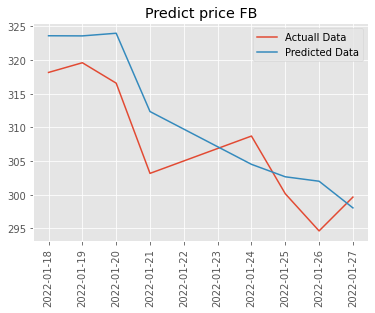

In [22]:
plt.style.use('ggplot')
plt.plot(y_new["Дата"], y_new["Цена"], label='Actuall Data') #actual plot
plt.plot(y_new["Дата"], y_new["Цена_прогноз"], label='Predicted Data') #predicted plot
plt.xticks(rotation=90)
plt.title('Predict price FB')
plt.legend()
plt.show()